In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
faults = pd.read_csv("../data/J1939Faults.csv")
faults.head()

C:\Users\nitin\AppData\Local\Temp\ipykernel_21084\3681478151.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  faults = pd.read_csv("../data/J1939Faults.csv")


,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,990360,2015-02-21 11:34:34.000,NaN,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,990416,2015-02-21 11:39:41.000,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000


In [3]:
faults[(faults['spn'] == 5246)]['fmi'].unique()

array([ 0, 15, 16, 19, 14], dtype=int64)

In [4]:
#removed rows from certina long and latititue . Lets go with 2 kms using haverson.
# Locations to drop around
drop_locations = [
    (36.0666667, -86.4347222),
    (35.5883333, -86.4438888),
    (36.1950, -83.174722)
]

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the distance in kilometers between two points on Earth 
    specified by their longitudes and latitudes in decimal degrees.
    """
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 
    return c * r

# Mark rows to drop
radius_km = 100
def is_near_any(row, locations, radius):
    for lat, lon in locations:
        if haversine(row['Latitude'], row['Longitude'], lat, lon) <= radius:
            return True
    return False

# Apply and filter
faults['drop'] = faults.apply(lambda row: is_near_any(row, drop_locations, radius_km), axis=1)
faults_cleaned = faults[~faults['drop']].drop(columns='drop')

In [5]:
faults_cleaned

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,990360,2015-02-21 11:34:34.000,NaN,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,990416,2015-02-21 11:39:41.000,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187329,1248453,123901925,2020-03-06 13:44:45.000,Low (Severity Medium) Engine Coolant Level,NaN,04358814*06030918*051718174436*09401683*G1*BDR*,79904453,6X1u13D1500000000,CMMNS,0,111,18,False,93,NaN,1886,105351219,39.013472,-77.037685,2020-03-06 13:44:41.000
1187331,1248455,123905139,2020-03-06 14:04:23.000,Condition Exists Engine Protection Torque Derate,NaN,04358814*06099720*030816202706*09400153*G1*BDR*,79932020,6X1u13D1500000000,CMMNS,0,1569,31,True,5,NaN,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000
1187332,1248456,123905996,2020-03-06 14:13:38.000,Abnormal Rate of Change Aftertreatment 1 Intak...,NaN,05317106*05100987*050719120655*09401585*G1*BDR*,79880653,6X1u13D1500000000,CMMNS,0,3216,10,True,1,NaN,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000
1187333,1248457,123906113,2020-03-06 14:14:13.000,Low (Severity Medium) Engine Coolant Level,NaN,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,True,8,NaN,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000


In [6]:
faults_cleaned.isnull().sum()

RecordID                      0
ESS_Id                        0
EventTimeStamp                0
eventDescription          29557
actionDescription        667933
ecuSoftwareVersion       172688
ecuSerialNumber          199187
ecuModel                  35879
ecuMake                   35879
ecuSource                     0
spn                           0
fmi                           0
active                        0
activeTransitionCount         0
faultValue               667933
EquipmentID                   0
MCTNumber                     0
Latitude                      0
Longitude                     0
LocationTimeStamp             0
dtype: int64

In [8]:
faults_selected = faults_cleaned[['RecordID','EventTimeStamp','eventDescription','spn','fmi','active','activeTransitionCount','EquipmentID','Latitude','Longitude','LocationTimeStamp']]
faults_selected.head()

,RecordID,EventTimeStamp,eventDescription,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,Longitude,LocationTimeStamp
0,1,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,111,17,True,2,1439,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,2015-02-21 11:34:34.000,NaN,629,12,True,127,1439,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,1807,2,False,127,1369,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,1807,2,True,127,1369,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,2015-02-21 11:39:41.000,NaN,4364,17,False,2,1674,38.416481,-89.442638,2015-02-21 11:39:37.000


In [9]:
diagnostics = pd.read_csv("../data/VehicleDiagnosticOnboardData.csv")

diagnostics.head()

,Id,Name,Value,FaultId
0,1,IgnStatus,False,1
1,2,EngineOilPressure,0,1
2,3,EngineOilTemperature,96.74375,1
3,4,TurboBoostPressure,0,1
4,5,EngineLoad,11,1


In [10]:
diag_pivoted = diagnostics.pivot(index='FaultId', columns='Name', values='Value').reset_index()

In [11]:
#Lets merge faults and diagnosis
faults_diag_merged = pd.merge(faults_selected, diag_pivoted, how='left', left_on='RecordID', right_on='FaultId')
faults_diag_merged

,RecordID,EventTimeStamp,eventDescription,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,Longitude,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
0,1,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,111,17,True,2,1439,38.857638,-84.626851,...,NaN,False,78.8,1023,True,NaN,0,3276.75,NaN,0
1,2,2015-02-21 11:34:34.000,NaN,629,12,True,127,1439,38.857638,-84.626851,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,1807,2,False,127,1369,41.421250,-87.767361,...,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,1807,2,True,127,1369,41.421018,-87.767361,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2015-02-21 11:39:41.000,NaN,4364,17,False,2,1674,38.416481,-89.442638,...,NaN,NaN,NaN,16639,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667928,1248453,2020-03-06 13:44:45.000,Low (Severity Medium) Engine Coolant Level,111,18,False,93,1886,39.013472,-77.037685,...,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
667929,1248455,2020-03-06 14:04:23.000,Condition Exists Engine Protection Torque Derate,1569,31,True,5,1994,34.390740,-79.461805,...,32,True,98.6,18431,False,NaN,65.01096,NaN,73.2,7.83
667930,1248456,2020-03-06 14:13:38.000,Abnormal Rate of Change Aftertreatment 1 Intak...,3216,10,True,1,1850,34.430370,-84.920509,...,NaN,True,91.4,17407,NaN,NaN,66.5741,NaN,100,6.96
667931,1248457,2020-03-06 14:14:13.000,Low (Severity Medium) Engine Coolant Level,111,18,True,8,2377,35.030925,-85.321527,...,NaN,True,100.4,1023,False,NaN,11.84489,14.1,100,1.74


In [12]:
#convert time stamp from object to date
faults_diag_merged['EventTimeStamp'] = pd.to_datetime(faults_diag_merged['EventTimeStamp'],errors='coerce')
faults_diag_merged['LocationTimeStamp'] = pd.to_datetime(faults_diag_merged['LocationTimeStamp'],errors='coerce')
faults_diag_merged

,RecordID,EventTimeStamp,eventDescription,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,Longitude,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
0,1,2015-02-21 10:47:13,Low (Severity Low) Engine Coolant Level,111,17,True,2,1439,38.857638,-84.626851,...,NaN,False,78.8,1023,True,NaN,0,3276.75,NaN,0
1,2,2015-02-21 11:34:34,NaN,629,12,True,127,1439,38.857638,-84.626851,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2015-02-21 11:35:31,Incorrect Data Steering Wheel Angle,1807,2,False,127,1369,41.421250,-87.767361,...,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2015-02-21 11:35:33,Incorrect Data Steering Wheel Angle,1807,2,True,127,1369,41.421018,-87.767361,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2015-02-21 11:39:41,NaN,4364,17,False,2,1674,38.416481,-89.442638,...,NaN,NaN,NaN,16639,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667928,1248453,2020-03-06 13:44:45,Low (Severity Medium) Engine Coolant Level,111,18,False,93,1886,39.013472,-77.037685,...,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
667929,1248455,2020-03-06 14:04:23,Condition Exists Engine Protection Torque Derate,1569,31,True,5,1994,34.390740,-79.461805,...,32,True,98.6,18431,False,NaN,65.01096,NaN,73.2,7.83
667930,1248456,2020-03-06 14:13:38,Abnormal Rate of Change Aftertreatment 1 Intak...,3216,10,True,1,1850,34.430370,-84.920509,...,NaN,True,91.4,17407,NaN,NaN,66.5741,NaN,100,6.96
667931,1248457,2020-03-06 14:14:13,Low (Severity Medium) Engine Coolant Level,111,18,True,8,2377,35.030925,-85.321527,...,NaN,True,100.4,1023,False,NaN,11.84489,14.1,100,1.74


In [13]:
faults_diag_merged.loc[ (faults_diag_merged['spn'] == 3480) &  (faults_diag_merged['EventTimeStamp'] < '2019-01-01')]

,RecordID,EventTimeStamp,eventDescription,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,Longitude,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
1765,3217,2015-02-23 20:16:46,Incorrect Data Aftertreatment 1 Fuel Pressure 1,3480,2,False,1,1375,36.946435,-80.949074,...,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN,NaN
1766,3218,2015-02-23 20:16:46,Low (Severity Low) Aftertreatment 1 Fuel Press...,3480,17,False,1,1375,36.946435,-80.949074,...,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN,NaN
3283,5795,2015-02-25 14:31:00,Low (Severity Low) Aftertreatment 1 Fuel Press...,3480,17,True,1,1601,41.217777,-81.650833,...,NaN,True,87.8,17407,NaN,NaN,40.27262,3276.75,NaN,11.02
4880,8486,2015-03-11 11:46:26,Low Voltage (Aftertreatment 1 Fuel Pressure 1),3480,4,True,1,1368,40.841574,-74.021759,...,NaN,True,NaN,18431,NaN,NaN,NaN,NaN,NaN,NaN
4922,8540,2015-03-11 15:43:44,Low Voltage (Aftertreatment 1 Fuel Pressure 1),3480,4,False,1,1368,40.841296,-74.021574,...,NaN,NaN,NaN,2047,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591004,1086595,2018-11-28 16:00:57,Low (Severity Low) Aftertreatment 1 Fuel Press...,3480,17,True,1,1879,36.950000,-81.053611,...,NaN,True,80.6,17407,False,NaN,47.40868,NaN,50,20.59
592500,1089438,2018-12-04 11:34:18,Low Voltage (Aftertreatment 1 Fuel Pressure 1),3480,4,True,1,1699,37.370231,-79.916712,...,NaN,True,111.2,17407,False,NaN,2.16509,NaN,100,0.87
592514,1089463,2018-12-04 11:34:18,Low Voltage (Aftertreatment 1 Fuel Pressure 1),3480,4,True,1,1699,37.370231,-79.916712,...,NaN,True,111.2,17407,False,NaN,2.16509,NaN,100,0.87
592616,1089681,2018-12-05 01:36:12,Low Voltage (Aftertreatment 1 Fuel Pressure 1),3480,4,False,1,1699,38.965324,-78.440370,...,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
faults_diag_merged[(faults_diag_merged['EquipmentID'] == '1692') & (faults_diag_merged['EventTimeStamp'] <= '2018-12-31')
].sort_values(by='EventTimeStamp',ascending=True)

,RecordID,EventTimeStamp,eventDescription,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,Longitude,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
5699,9946,2015-03-19 11:40:27,Low (Severity Low) Engine Coolant Level,111,17,True,8,1692,33.164722,-95.217592,...,32,True,66.2,1023,False,NaN,6.650613,3276.75,0,2.03
5700,9947,2015-03-19 11:43:05,Low (Severity Low) Engine Coolant Level,111,17,False,8,1692,33.162361,-95.240879,...,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
12308,22722,2015-04-15 09:25:19,Low (Severity Low) Engine Coolant Level,111,17,True,14,1692,34.656944,-84.979768,...,32,True,86,1023,False,NaN,3.398124,3276.75,0,1.45
12365,22821,2015-04-15 10:28:21,Low (Severity Low) Engine Coolant Level,111,17,False,14,1692,34.667407,-84.993657,...,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
12725,23530,2015-04-16 00:00:08,Low (Severity Low) Engine Coolant Level,111,17,True,16,1692,38.072824,-84.927129,...,32,True,77,1023,True,NaN,0,3276.75,0,0.29
12726,23531,2015-04-16 00:05:34,Low (Severity Low) Engine Coolant Level,111,17,False,16,1692,38.073055,-84.927407,...,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
16296,30465,2015-04-22 08:01:19,Low (Severity Low) Engine Coolant Level,111,17,True,18,1692,40.968888,-75.632175,...,32,True,66.2,1023,False,NaN,6.04866,3276.75,0,3.48
16420,30711,2015-04-22 10:21:46,Low (Severity Low) Engine Coolant Level,111,17,False,18,1692,40.928472,-75.644490,...,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
16423,30718,2015-04-22 10:23:53,Low (Severity Low) Engine Coolant Level,111,17,True,19,1692,40.890046,-75.646111,...,32,True,73.4,1023,False,NaN,62.36042,3276.75,0,3.48
16424,30720,2015-04-22 10:25:35,Low (Severity Low) Engine Coolant Level,111,17,False,19,1692,40.877083,-75.657314,...,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
faults_targetted = faults_diag_merged[faults_diag_merged['EquipmentID']
.isin(list(faults_diag_merged[ (faults_diag_merged['spn'] == 5246) & 
           (faults_diag_merged['active'] == True) &
           (faults_diag_merged['EventTimeStamp'] <= '2018-12-31')]['EquipmentID']
           .unique()))]
# Sort just to be safe
temp_sort_df = faults_targetted.sort_values(by=['EquipmentID', 'EventTimeStamp'])

# List to collect all event frames
all_events = []

# Loop through each TruckID
for truck_id, truck_df in temp_sort_df.groupby('EquipmentID'):
    truck_df = truck_df.sort_values('EventTimeStamp')
    
    # Find 5246 occurrences
    hits_5246 = truck_df[truck_df['spn'] == 5246]['EventTimeStamp'].reset_index(drop=True)
    
    event_counter = 1  # Reset counter for each truck

    for i, current_hit_time in enumerate(hits_5246):
        # Window: last 24 hours including current hit
        window_start = current_hit_time - pd.Timedelta(hours=8)

        # Find if any previous 5246 in that window
        previous_5246 = hits_5246[hits_5246 < current_hit_time]
        previous_5246_in_window = previous_5246[previous_5246 >= window_start]

        if not previous_5246_in_window.empty:
            # If previous 5246 found within window, start from that
            adjusted_start_time = previous_5246_in_window.max()
        else:
            # Otherwise normal 24-hour window
            adjusted_start_time = window_start
        
        mask = (truck_df['EventTimeStamp'] >= adjusted_start_time) & (truck_df['EventTimeStamp'] <= current_hit_time) & (truck_df['active'] == True)
        window_df = truck_df[mask].copy()

        # Drop if only 5246 exists in window
        if window_df['spn'].nunique() == 1 and (5246 in window_df['spn'].unique()):
            # Only 5246 present → Skip this window
            continue

        # Sort by Time just to be safe
        window_df = window_df.sort_values('EventTimeStamp')

        # De-duplication: Check (Code, Latitude, Longitude) against ALL previous
        seen = set()
        deduped_rows = []

        for idx, row in window_df.iterrows():
            key = (row['spn'], row['Latitude'], row['Longitude'])
            if key not in seen:
                seen.add(key)
                deduped_rows.append(row)

        # Create cleaned DataFrame
        deduped_window_df = pd.DataFrame(deduped_rows)
        
        # Label the Event
        deduped_window_df['Event'] = f"{truck_id}_5246_Event#{event_counter}"
        
        all_events.append(deduped_window_df)
        
        event_counter += 1

# Combine all events together
final_df = pd.concat(all_events, ignore_index=True)

# Drop exact duplicates across events
final_df = final_df.drop_duplicates(subset=['EventTimeStamp', 'spn', 'Latitude', 'Longitude'])

# Get the 5246 times for each Event
event_5246_times = final_df[final_df['spn'] == 5246].groupby('Event')['EventTimeStamp'].min()

# Merge that info back into final_df
final_df['Event_5246_Time'] = final_df['Event'].map(event_5246_times)

# Now calculate Hours Before 5246
final_df['Hours_Before_5246'] = (final_df['Event_5246_Time'] - final_df['EventTimeStamp']).dt.total_seconds() / 3600


# print("\nFinal Data with Event Labels:")
# #print(final_df)

# # # Now Pivot: Create summary table
# pivot_wider = final_df.pivot_table(
#     index='Event',
#     columns='spn',
#     values='EquipmentID',  # any non-null field works
#     aggfunc='count',
#     fill_value=0
# )

# Group by TruckID, Event, and Code
# summary_df = final_df.groupby(['EquipmentID', 'Event', 'spn']).size().reset_index(name='Count')
# summary_df

In [62]:
final_df

,Event,RecordID,EventTimeStamp,eventDescription,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,...,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,Event_5246_Time,Hours_Before_5246
0,305_5246_Event#2,332331.0,2016-01-03 17:40:11,NaN,4349.0,7.0,True,22.0,305,34.793194,...,120.2,18431,False,NaN,38.92308,NaN,94.4,33.35,2016-01-03 17:49:35,0.156667
1,305_5246_Event#2,332332.0,2016-01-03 17:40:11,Error in System Engine Torque Limit Request - ...,1787.0,11.0,True,15.0,305,34.793194,...,120.2,18431,False,NaN,38.92308,NaN,94.4,33.35,2016-01-03 17:49:35,0.156667
2,305_5246_Event#2,332334.0,2016-01-03 17:48:52,Special Instructions Maximum Vehicle Speed Limit,74.0,14.0,True,10.0,305,34.794027,...,129.2,22527,False,NaN,0,NaN,8.400001,1.16,2016-01-03 17:49:35,0.011944
3,305_5246_Event#2,332336.0,2016-01-03 17:49:35,NaN,5246.0,19.0,True,4.0,305,34.793564,...,131,255,False,NaN,0,NaN,13.2,1.74,2016-01-03 17:49:35,0.000000
4,1366_5246_Event#1,86078.0,2015-06-13 02:31:08,Condition Exists Engine Protection Torque Derate,1569.0,31.0,True,1.0,1366,33.208981,...,134.6,18431,True,NaN,0,3276.75,NaN,0.58,2015-06-13 03:33:30,1.039444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,1942_5246_Event#2,1034222.0,2018-07-10 13:37:00,Data May Be Invalid Catalyst Tank Level,1761.0,19.0,True,124.0,1942,32.348425,...,127.4,255,False,NaN,0,NaN,100,0.29,2018-07-10 13:37:00,0.000000
979,1942_5246_Event#2,1034224.0,2018-07-10 13:37:00,Abnormal Update Rate Catalyst Tank Temperature,3031.0,9.0,True,10.0,1942,32.348425,...,127.4,22527,False,NaN,0,NaN,100,0.29,2018-07-10 13:37:00,0.000000
980,305_5246_Event#1,1029681.0,2018-06-25 12:12:13,High (Severity Medium) Aftertreatment 1 Outlet...,3226.0,16.0,True,3.0,305,37.784768,...,104,18431,False,NaN,52.40878,NaN,97.6,20.01,2018-06-25 14:48:16,2.600833
981,305_5246_Event#1,1029757.0,2018-06-25 14:47:46,Special Instructions Maximum Vehicle Speed Limit,74.0,14.0,True,1.0,305,37.644166,...,134.6,22527,False,NaN,NaN,NaN,NaN,NaN,2018-06-25 14:48:16,0.008333


In [35]:
summary_df = final_df.groupby(['EquipmentID', 'Event', 'spn','fmi']).size().reset_index(name='Count')
summary_df

,EquipmentID,Event,spn,fmi,Count
0,305,305_5246_Event#2,74.0,14.0,1
1,305,305_5246_Event#2,1787.0,11.0,1
2,305,305_5246_Event#2,4349.0,7.0,1
3,305,305_5246_Event#2,5246.0,19.0,1
4,1366,1366_5246_Event#1,1569.0,31.0,1
...,...,...,...,...,...
752,1942,1942_5246_Event#2,3364.0,9.0,1
753,1942,1942_5246_Event#2,5246.0,0.0,1
754,305,305_5246_Event#1,74.0,14.0,1
755,305,305_5246_Event#1,3226.0,16.0,1


In [61]:
summary_df[(summary_df['spn'] != 5246)][['spn','fmi']].value_counts().reset_index(name='Count').rename(columns={'index': 'spn'}).sort_values(by='Count', ascending=False)

,spn,fmi,Count
0,1569.0,31.0,77
1,4094.0,18.0,41
2,3362.0,31.0,21
3,5394.0,17.0,16
4,111.0,17.0,16
...,...,...,...
111,5742.0,3.0,1
112,96.0,4.0,1
113,4339.0,7.0,1
114,612.0,2.0,1


In [56]:
summary_df[(summary_df['spn'] != 5246)][['spn']].value_counts().reset_index(name='Count').rename(columns={'index': 'spn'}).sort_values(by='Count', ascending=False).head(60)

,spn,Count
0,1569.0,77
1,4094.0,57
2,5394.0,29
3,1761.0,24
4,111.0,24
5,3362.0,21
6,3031.0,20
7,3226.0,16
10,1231.0,15
9,96.0,15


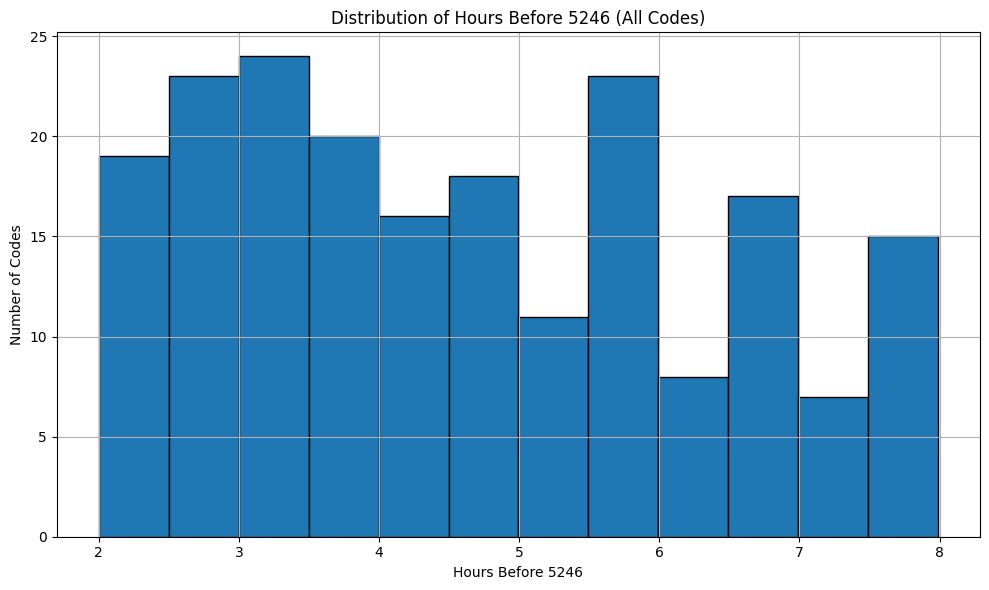

In [17]:
import matplotlib.pyplot as plt

# Only focus on rows that are NOT the 5246 code itself (time difference 0)
hist_data = final_df[(final_df['spn'] != 5246) & (final_df['Hours_Before_5246'] >= 2)]
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(hist_data['Hours_Before_5246'], bins=12, edgecolor='black')

plt.title('Distribution of Hours Before 5246 (All Codes)')
plt.xlabel('Hours Before 5246')
plt.ylabel('Number of Codes')
plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
hist_data[(hist_data['spn'] == 1569)]

,Event,RecordID,EventTimeStamp,eventDescription,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,...,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,Event_5246_Time,Hours_Before_5246
11,1366_5246_Event#3,214277.0,2015-09-23 07:25:22,Condition Exists Engine Protection Torque Derate,1569.0,31.0,True,1.0,1366,35.750509,...,86,18431,False,NaN,54.34085,NaN,NaN,9.57,2015-09-23 10:28:29,3.051944
18,1384_5246_Event#1,381440.0,2016-02-12 15:14:34,Condition Exists Engine Protection Torque Derate,1569.0,31.0,True,1.0,1384,35.869629,...,84.2,18431,NaN,NaN,57.70014,NaN,NaN,28.42,2016-02-12 19:59:08,4.742778
23,1395_5246_Event#1,387830.0,2016-02-17 23:31:04,Condition Exists Engine Protection Torque Derate,1569.0,31.0,True,1.0,1395,38.444490,...,64.4,18431,NaN,NaN,5.068059,NaN,NaN,1.16,2016-02-18 04:50:10,5.318333
25,1396_5246_Event#1,48772.0,2015-05-11 01:09:40,Condition Exists Engine Protection Torque Derate,1569.0,31.0,True,1.0,1396,36.533148,...,86,18431,NaN,NaN,57.32149,3276.75,NaN,1.16,2015-05-11 04:00:32,2.847778
29,1419_5246_Event#1,458166.0,2016-04-24 16:36:26,Condition Exists Engine Protection Torque Derate,1569.0,31.0,True,1.0,1419,33.997592,...,120.2,18431,NaN,NaN,64.85562,NaN,NaN,11.6,2016-04-24 22:50:49,6.239722
33,1437_5246_Event#1,164423.0,2015-08-13 11:38:41,Condition Exists Engine Protection Torque Derate,1569.0,31.0,True,1.0,1437,40.050555,...,95,18431,False,NaN,64.00124,3276.75,NaN,15.66,2015-08-13 19:27:04,7.806389
81,1453_5246_Event#1,166412.0,2015-08-14 11:09:55,Condition Exists Engine Protection Torque Derate,1569.0,31.0,True,1.0,1453,36.036296,...,113,18431,False,NaN,67.04012,3276.75,NaN,3.77,2015-08-14 19:02:29,7.876111
96,1453_5246_Event#6,172018.0,2015-08-18 14:50:25,Condition Exists Engine Protection Torque Derate,1569.0,31.0,True,1.0,1453,35.902037,...,113,18431,False,NaN,64.51581,3276.75,NaN,4.64,2015-08-18 18:10:34,3.335833
101,1453_5246_Event#8,190457.0,2015-09-02 11:26:52,Condition Exists Engine Protection Torque Derate,1569.0,31.0,True,1.0,1453,35.155324,...,136.4,18431,False,NaN,38.23375,NaN,NaN,31.61,2015-09-02 15:39:52,4.216667
105,1458_5246_Event#1,423893.0,2016-03-22 06:10:21,Condition Exists Engine Protection Torque Derate,1569.0,31.0,True,1.0,1458,41.055648,...,44.6,18431,True,NaN,0,NaN,NaN,0,2016-03-22 09:37:39,3.455000


In [18]:
final_df[(final_df['spn'] != 5246) & (final_df['Hours_Before_5246'] >= 2)].groupby(['EquipmentID', 'Event', 'spn']).size().reset_index(name='Count')

,EquipmentID,Event,spn,Count
0,1366,1366_5246_Event#3,1569.0,1
1,1366,1366_5246_Event#3,4094.0,1
2,1366,1366_5246_Event#3,4364.0,1
3,1384,1384_5246_Event#1,1569.0,1
4,1395,1395_5246_Event#1,1569.0,1
...,...,...,...,...
145,1878,1878_5246_Event#1,1569.0,2
146,1878,1878_5246_Event#1,1761.0,3
147,1878,1878_5246_Event#1,3031.0,1
148,1878,1878_5246_Event#1,3364.0,3


In [19]:
# Only keep codes that happened BEFORE 5246 (not after)
early_warnings = final_df[(final_df['spn'] != 5246) & (final_df['Hours_Before_5246'] >= 2) & (final_df['Hours_Before_5246'] <= 6)]

# Group by Code
early_indicator_stats = early_warnings.groupby('spn').agg(
    avg_hours_before_5246=('Hours_Before_5246', 'mean'),
    count_occurrences=('Hours_Before_5246', 'count')
).reset_index()

# Sort to find best early indicators:
# First by count (descending), then by avg_hours (descending)
early_indicator_stats = early_indicator_stats.sort_values(
    by=['count_occurrences', 'avg_hours_before_5246'],
    ascending=[False, False]
)

early_indicator_stats.head()


,spn,avg_hours_before_5246,count_occurrences
17,1569.0,3.740507,46
3,96.0,3.603868,13
4,111.0,2.871090,13
15,929.0,3.374201,8
36,5394.0,4.039167,6


In [20]:
# #which codes are the best early indicators before 5246

# # Plot
# plt.figure(figsize=(12, 8))

# # Scatterplot
# sns.scatterplot(
#     data=early_indicator_stats,
#     x='avg_hours_before_5246',
#     y='count_occurrences',
#     #hue='spn',
#     size='count_occurrences',
#     sizes=(50, 300),
#     palette='tab10',
#     legend='brief'
# )
#    # Annotate each point
# for i, row in early_indicator_stats.iterrows():
#     plt.text(row['avg_hours_before_5246'], row['count_occurrences'], str(row['spn']),horizontalalignment='center', verticalalignment='bottom', fontsize=9)

# plt.title('Early Indicator Codes before 5246')
# plt.xlabel('Average Hours Before 5246 (Higher = Earlier)')
# plt.ylabel('Number of Occurrences (Higher = More Reliable)')
# #plt.gca().invert_xaxis()  # Optional: show 24 -> 0 if you want earlier to later
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [31]:
#top 5 spn codes per event

# Step 1: Group by TruckID, Event, and Code, and count
event_code_counts = final_df.groupby(['EquipmentID', 'Event', 'spn']).size().reset_index(name='Count')

# Step 2: For each Event, get Top 5 Codes
# Sort first by TruckID, Event, Count descending
event_code_counts = event_code_counts.sort_values(['EquipmentID', 'Event', 'Count'], ascending=[True, True, False])

# Step 3: Rank codes within each event
event_code_counts['Rank'] = event_code_counts.groupby(['EquipmentID', 'Event'])['Count'].rank(method='first', ascending=False)

# Step 4: Filter only top 5 per Event
top_codes_per_event = event_code_counts[event_code_counts['Rank'] <= 10]

top_codes_per_event


,EquipmentID,Event,spn,Count,Rank
0,305,305_5246_Event#2,74.0,1,1.0
1,305,305_5246_Event#2,1787.0,1,2.0
2,305,305_5246_Event#2,4349.0,1,3.0
3,305,305_5246_Event#2,5246.0,1,4.0
4,1366,1366_5246_Event#1,1569.0,1,1.0
...,...,...,...,...,...
747,1942,1942_5246_Event#2,3364.0,1,4.0
748,1942,1942_5246_Event#2,5246.0,1,5.0
749,305,305_5246_Event#1,74.0,1,1.0
750,305,305_5246_Event#1,3226.0,1,2.0


<Axes: xlabel='spn', ylabel='Total_Count'>

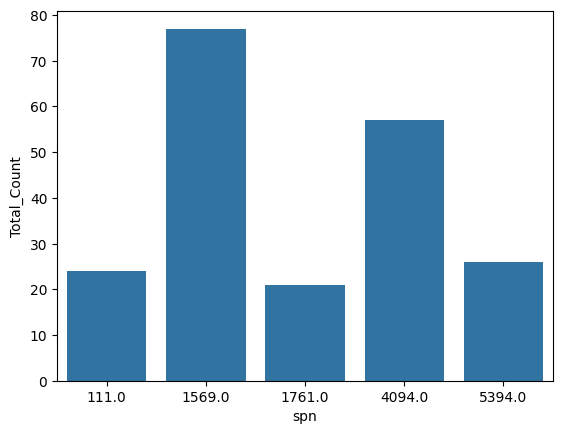

In [32]:
top_codes_per_event_1 = top_codes_per_event[(top_codes_per_event['spn'] != 5246)]

# If you want overall (ignoring TruckID/Event), just group by Code:
overall_code_counts = top_codes_per_event_1.groupby('spn').size().reset_index(name='Total_Count')

# Sort by highest count
overall_code_counts = overall_code_counts.sort_values('Total_Count', ascending=False)

top_codes = overall_code_counts.head(5)
sns.barplot(data=top_codes, x='spn', y='Total_Count')

In [34]:
overall_code_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 40 to 88
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   spn          89 non-null     float64
 1   Total_Count  89 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 2.1 KB


In [23]:
event_code_counts[event_code_counts['spn']==3480]

,EquipmentID,Event,spn,Count,Rank
507,1749,1749_5246_Event#3,3480.0,1,2.0
568,1800,1800_5246_Event#2,3480.0,1,11.0
576,1800,1800_5246_Event#3,3480.0,1,4.0


## Lets split the 5246 and count until the last 5246 hit

In [24]:
faults_diag_merged[(faults_diag_merged['EquipmentID'] == 1524) & (faults_diag_merged['EventTimeStamp'] >= '2016-01-07 14:01:47	') & (faults_diag_merged['EventTimeStamp'] <= '2016-01-26 23:07:24')][['EventTimeStamp','spn','fmi','Latitude','Longitude']].sort_values(by='EventTimeStamp',ascending=True)

,EventTimeStamp,spn,fmi,Latitude,Longitude
188059,2016-01-07 14:01:47,1231,9,35.059259,-89.997638
188119,2016-01-07 15:20:11,4094,18,35.059259,-89.997638
188120,2016-01-07 15:20:11,5394,17,35.059259,-89.997638
188121,2016-01-07 15:20:11,1231,9,35.059259,-89.997638
188270,2016-01-07 20:59:03,4094,1,35.059259,-89.997685
188269,2016-01-07 20:59:42,5246,0,35.059259,-89.997685
188275,2016-01-07 21:17:10,1231,9,35.059305,-89.997638
188276,2016-01-07 21:19:17,1231,9,35.059305,-89.997638
188292,2016-01-07 23:19:54,4094,1,35.059259,-89.997638
194794,2016-01-18 16:57:14,5246,16,35.986342,-85.013148


In [25]:
faults_targetted = faults_diag_merged[faults_diag_merged['EquipmentID']
.isin(list(faults_diag_merged[ (faults_diag_merged['spn'] == 5246) & 
           (faults_diag_merged['active'] == True) &
           (faults_diag_merged['EventTimeStamp'] <= '2018-12-31')]['EquipmentID']
           .unique()))]
# Sort just to be safe
temp_sort_df = faults_targetted.sort_values(by=['EquipmentID', 'EventTimeStamp'])

# List to collect all event frames
all_events = []

# Loop through each TruckID
for truck_id, truck_df in temp_sort_df.groupby('EquipmentID'):
    truck_df = truck_df.sort_values('EventTimeStamp')
    
    # Find 5246 occurrences
    hits_5246 = truck_df[truck_df['spn'] == 5246]['EventTimeStamp'].reset_index(drop=True)
    
    event_counter = 1  # Reset counter for each truck

    for i, current_hit_time in enumerate(hits_5246):
        # Window: last 24 hours including current hit
        window_start = current_hit_time - pd.Timedelta(hours=8)

        # Find if any previous 5246 in that window
        previous_5246 = hits_5246[hits_5246 < current_hit_time]
        previous_5246_in_window = previous_5246[previous_5246 >= window_start]

        if not previous_5246_in_window.empty:
            # If previous 5246 found within window, start from that
            adjusted_start_time = previous_5246_in_window.max()
        else:
            # Otherwise normal 24-hour window
            adjusted_start_time = window_start
        
        mask = (truck_df['EventTimeStamp'] >= adjusted_start_time) & (truck_df['EventTimeStamp'] <= current_hit_time) & (truck_df['active'] == True)
        window_df = truck_df[mask].copy()

        # Drop if only 5246 exists in window
        if window_df['spn'].nunique() == 1 and (5246 in window_df['spn'].unique()):
            # Only 5246 present → Skip this window
            continue

        # Sort by Time just to be safe
        window_df = window_df.sort_values('EventTimeStamp')

        # De-duplication: Check (Code, Latitude, Longitude) against ALL previous
        seen = set()
        deduped_rows = []

        for idx, row in window_df.iterrows():
            key = (row['spn'], row['Latitude'], row['Longitude'])
            if key not in seen:
                seen.add(key)
                deduped_rows.append(row)

        # Create cleaned DataFrame
        deduped_window_df = pd.DataFrame(deduped_rows)
        
        # Label the Event
        deduped_window_df['Event'] = f"{truck_id}_5246_Event#{event_counter}"
        
        all_events.append(deduped_window_df)
        
        event_counter += 1

# Combine all events together
final_df = pd.concat(all_events, ignore_index=True)

# Drop exact duplicates across events
final_df = final_df.drop_duplicates(subset=['EventTimeStamp', 'spn', 'Latitude', 'Longitude'])

# Get the 5246 times for each Event
event_5246_times = final_df[final_df['spn'] == 5246].groupby('Event')['EventTimeStamp'].min()

# Merge that info back into final_df
final_df['Event_5246_Time'] = final_df['Event'].map(event_5246_times)

# Now calculate Hours Before 5246
final_df['Hours_Before_5246'] = (final_df['Event_5246_Time'] - final_df['EventTimeStamp']).dt.total_seconds() / 3600


# print("\nFinal Data with Event Labels:")
# #print(final_df)

# # # Now Pivot: Create summary table
# pivot_wider = final_df.pivot_table(
#     index='Event',
#     columns='spn',
#     values='EquipmentID',  # any non-null field works
#     aggfunc='count',
#     fill_value=0
# )

# Group by TruckID, Event, and Code
# summary_df = final_df.groupby(['EquipmentID', 'Event', 'spn']).size().reset_index(name='Count')
# summary_df

In [26]:
final_df[(final_df['EquipmentID'] == 1524)][['Event','EventTimeStamp','spn','fmi','Latitude','Longitude']].sort_values(by='EventTimeStamp',ascending=True)

,Event,EventTimeStamp,spn,fmi,Latitude,Longitude
156,1524_5246_Event#1,2016-01-06 14:07:24,4094.0,18.0,35.873379,-87.859537
157,1524_5246_Event#1,2016-01-06 14:07:24,5246.0,16.0,35.873379,-87.859537
160,1524_5246_Event#2,2016-01-06 19:45:54,5246.0,0.0,35.031481,-89.891018
161,1524_5246_Event#3,2016-01-06 19:50:41,4094.0,1.0,35.031435,-89.891018
162,1524_5246_Event#4,2016-01-07 14:01:47,1231.0,9.0,35.059259,-89.997638
163,1524_5246_Event#4,2016-01-07 20:59:03,4094.0,1.0,35.059259,-89.997685
165,1524_5246_Event#6,2016-01-22 18:39:26,4375.0,5.0,35.019490,-85.282175
166,1524_5246_Event#6,2016-01-22 18:39:26,4334.0,5.0,35.019490,-85.282175
164,1524_5246_Event#6,2016-01-22 18:39:26,4376.0,5.0,35.019490,-85.282175
167,1524_5246_Event#6,2016-01-22 20:48:42,111.0,1.0,35.019537,-85.282222


In [27]:
faults_targetted[faults_targetted['spn'] == 5246].groupby('EquipmentID').size().reset_index(name='count').sort_values(by='count', ascending=False).head(60)

,EquipmentID,count
25,1524,34
30,1535,34
17,1453,20
34,1549,18
27,1528,16
26,1525,15
31,1539,15
24,1521,14
32,1543,13
29,1534,11


In [28]:
# Only keep codes that happened BEFORE 5246 (not after)
early_warnings = final_df[(final_df['spn'] != 5246) & (final_df['Hours_Before_5246'] >= 2) & (final_df['Hours_Before_5246'] <= 6)]

# Group by Code
early_indicator_stats = early_warnings.groupby('spn').agg(
    avg_hours_before_5246=('Hours_Before_5246', 'mean'),
    count_occurrences=('Hours_Before_5246', 'count')
).reset_index()

# Sort to find best early indicators:
# First by count (descending), then by avg_hours (descending)
early_indicator_stats = early_indicator_stats.sort_values(
    by=['count_occurrences', 'avg_hours_before_5246'],
    ascending=[False, False]
)

early_indicator_stats.head()

,spn,avg_hours_before_5246,count_occurrences
17,1569.0,3.740507,46
3,96.0,3.603868,13
4,111.0,2.871090,13
15,929.0,3.374201,8
36,5394.0,4.039167,6


In [29]:
summary_df = final_df.groupby(['EquipmentID', 'Event', 'spn']).size().reset_index(name='Count')
summary_df

,EquipmentID,Event,spn,Count
0,305,305_5246_Event#2,74.0,1
1,305,305_5246_Event#2,1787.0,1
2,305,305_5246_Event#2,4349.0,1
3,305,305_5246_Event#2,5246.0,1
4,1366,1366_5246_Event#1,1569.0,1
...,...,...,...,...
747,1942,1942_5246_Event#2,3364.0,1
748,1942,1942_5246_Event#2,5246.0,1
749,305,305_5246_Event#1,74.0,1
750,305,305_5246_Event#1,3226.0,1


In [30]:
final_df.groupby(['Event']).size().reset_index(name='Count').sort_values('Count',ascending=False)

,Event,Count
179,1692_5246_Event#1,20
220,1800_5246_Event#2,15
242,1919_5246_Event#2,13
166,1630_5246_Event#1,13
144,1564_5246_Event#1,13
...,...,...
218,1795_5246_Event#2,1
20,1452_5246_Event#4,1
222,1800_5246_Event#4,1
108,1535_5246_Event#8,1
